In [72]:
import pandas as pd
from sklearn.ensemble  import RandomForestClassifier # Random Forest Classifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, roc_auc_score, make_scorer
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder # Encode Categorical Variable to Numerical Variable
from sklearn.metrics import confusion_matrix # Library for model evaluation
from sklearn.metrics import accuracy_score # Library for model evaluation
from sklearn.model_selection import train_test_split # Library to split datset into test and train

from sklearn.dummy import DummyClassifier
from sklearn.linear_model  import LogisticRegression # Logistic Regression Classifier
from sklearn.linear_model import SGDClassifier # Stochastic Gradient Descent Classifier
from sklearn.tree import DecisionTreeClassifier # Decision Tree Classifier
from sklearn.ensemble  import RandomForestClassifier # Random Forest Classifier
from sklearn.neighbors import KNeighborsClassifier # K Nearest neighbors Classifier
from sklearn.naive_bayes import GaussianNB #Naive Bayes Classifier
from sklearn.svm import SVC #Support vector Machine Classifier
from sklearn.ensemble import AdaBoostClassifier # Ada Boost Classifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [3]:
features, target = load_breast_cancer(return_X_y=True)

In [4]:
X = pd.DataFrame(features, columns=data.feature_names)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
y=pd.Series(target).map({0:1, 1:0})

In [151]:
# Function for Precsion, Recall and F1 Score
def calc_classfier_metric(classifier, y_true, y_pred):
    '''
    Function for Precision, Recall and F1 Score
    # Note : By Default Precision, Recall & F1 score of 1 is shown in the metrics
    '''
    accuracy       = accuracy_score(y_test, y_pred)
    precision      = precision_score(y_test, y_pred)
    recall         = recall_score(y_test, y_pred)
    F1_score       = f1_score(y_test, y_pred)
    roc_auc_scr    = roc_auc_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    conf_mat       = np.array(np.array([[tn, fn], [fp, tp]]))
    class_report   = classification_report(y_true, y_pred, output_dict=True)
    
    return accuracy, precision, recall, F1_score, roc_auc_scr, conf_mat, class_report;

In [152]:
# Function for Confusion Matrix
def view_confusion_matrix(class_perf_df, columns):
    '''
    Function for Confusion Matrix
    '''
    rows = int(class_perf_df.shape[0])

    for i in range(class_perf_df.shape[0]):
        plt.subplot(rows,columns,i+1)
        plt.title(class_perf_df['Classifier'].loc[i])
        ax=sns.heatmap(class_perf_df['Conf_Mtrx'].loc[i],
                    annot=True,
                    cmap="coolwarm",
                    fmt="d",
                    cbar=False, 
                    annot_kws={"size": 12},
                    linewidths=1.2,
                    linecolor='w',
                   )
        ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, fontsize = 10)
        ax.set_yticklabels(ax.get_yticklabels(), rotation = 25, fontsize = 10)
        ax.set_xlabel('True label') 
        ax.set_ylabel('Predicted label')
    
    return;

In [153]:
# Build Classification Model
def build_class_model(X_train, X_test, y_train, y_test, classifier_model):
    '''
    Functio to Build Classification Model
    '''
    classifier_performance = []
    learning_curve_dtl = []
    classification_report = []
    cnf_lst = []

    for classifier in classifier_model:

        # Fitting the training set into classification model
        classifier.fit(X_train,y_train)

        # Predicting the output on test datset
        y_pred = classifier.predict(X_test)    
        
        # Cross Validation Score on training test
        scores = cross_val_score(
                                 classifier, 
                                 X_train,
                                 y_train, 
                                 scoring=make_scorer(f1_score, average='weighted', labels=[1]),
                                 cv=5
                                )
        cv_score_mean = scores.mean()
        
        # Learning Curve of Training/Cross Validation
        train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
                                                                                classifier, 
                                                                                X_train, 
                                                                                y_train, 
                                                                                cv=5, 
                                                                                scoring=make_scorer(f1_score, average='weighted', labels=[1]),
                                                                                return_times=True
                                                                            )
        
        # Classification score
        accuracy, precision, recall, F1_score, roc_auc_scr, conf_mat, class_report = calc_classfier_metric(classifier, y_test, y_pred)
        
        # Build Dataframes
        classifier_performance.append([classifier.__class__.__name__, cv_score_mean, conf_mat, accuracy, precision, recall, F1_score, roc_auc_scr])
        learning_curve_dtl.append([classifier.__class__.__name__, train_sizes, train_scores, test_scores, fit_times])
        classification_report.append([classifier.__class__.__name__, class_report])
        
        class_perf_df = pd.DataFrame(classifier_performance, columns=['Classifier', 'Training_CV_Score', 'Conf_Mtrx', 'Accuracy', 'Precision', 'Recall', 'F1_Score', 'ROC_AUC_Scr']).sort_values('F1_Score', ascending = False)
        learning_curve_df = pd.DataFrame(learning_curve_dtl, columns=['Classifier', 'train_sizes', 'train_scores', 'test_scores', 'fit_times'])
        class_report_df = pd.DataFrame(classification_report, columns=['Classifier', 'Report'])
        
    return class_perf_df, learning_curve_df, class_report_df;

In [154]:
def create_learning_curve(learning_curve_df):
    
    ''' Function to get training and cross validation '''
    
    plt.figure(figsize=(15, 50))
    rows = learning_curve_df.shape[0]
    
    for i in range(learning_curve_df.shape[0]):
        plt.subplot(rows, 3, i+1)
        plt.title(learning_curve_df['Classifier'].iloc[i])
    
        # Calculate training and test mean and std
        #
        train_mean = np.mean(learning_curve_df['train_scores'].iloc[i], axis=1)
        train_std  = np.std(learning_curve_df['train_scores'].iloc[i], axis=1)
        test_mean  = np.mean(learning_curve_df['test_scores'].iloc[i], axis=1)
        test_std   = np.std(learning_curve_df['test_scores'].iloc[i], axis=1)

        # Plot the learning curve
        #
        plt.plot(learning_curve_df['train_sizes'].iloc[i], train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
        plt.fill_between(learning_curve_df['train_sizes'].iloc[i], train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
        
        plt.plot(learning_curve_df['train_sizes'].iloc[i], test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
        plt.fill_between(learning_curve_df['train_sizes'].iloc[i], test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
        
        plt.xlabel('Training Data Size')
        plt.ylabel('Weighted F1 Score')
        plt.grid()
        plt.legend(loc='lower right')

In [155]:
# #Dividing data into test & train splitting 70% data for training anf 20% for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print('There are {} samples in the training set and {} samples in the test set'.format(X_train.shape[0], X_test.shape[0]))

There are 455 samples in the training set and 114 samples in the test set


Training Details - 


,Classifier,Training_CV_Score,Conf_Mtrx,Accuracy,Precision,Recall,F1_Score,ROC_AUC_Scr
7,AdaBoostClassifier,0.950219,"[[70, 2], [1, 41]]",0.973684,0.976190,0.953488,0.964706,0.969702
3,GaussianNB,0.908244,"[[71, 3], [0, 40]]",0.973684,1.000000,0.930233,0.963855,0.965116
6,RandomForestClassifier,0.939431,"[[70, 3], [1, 40]]",0.964912,0.975610,0.930233,0.952381,0.958074
9,LGBMClassifier,0.951214,"[[70, 3], [1, 40]]",0.964912,0.975610,0.930233,0.952381,0.958074
8,XGBClassifier,0.951685,"[[69, 3], [2, 40]]",0.956140,0.952381,0.930233,0.941176,0.951032
0,LogisticRegression,0.930809,"[[70, 4], [1, 39]]",0.956140,0.975000,0.906977,0.939759,0.946446
2,KNeighborsClassifier,0.892063,"[[71, 5], [0, 38]]",0.956140,1.000000,0.883721,0.938272,0.941860
5,DecisionTreeClassifier,0.888142,"[[68, 3], [3, 40]]",0.947368,0.930233,0.930233,0.930233,0.943990
4,SVC,0.853518,"[[71, 6], [0, 37]]",0.947368,1.000000,0.860465,0.925000,0.930233
1,SGDClassifier,0.737901,"[[71, 11], [0, 32]]",0.903509,1.000000,0.744186,0.853333,0.872093


Learning Curves - 


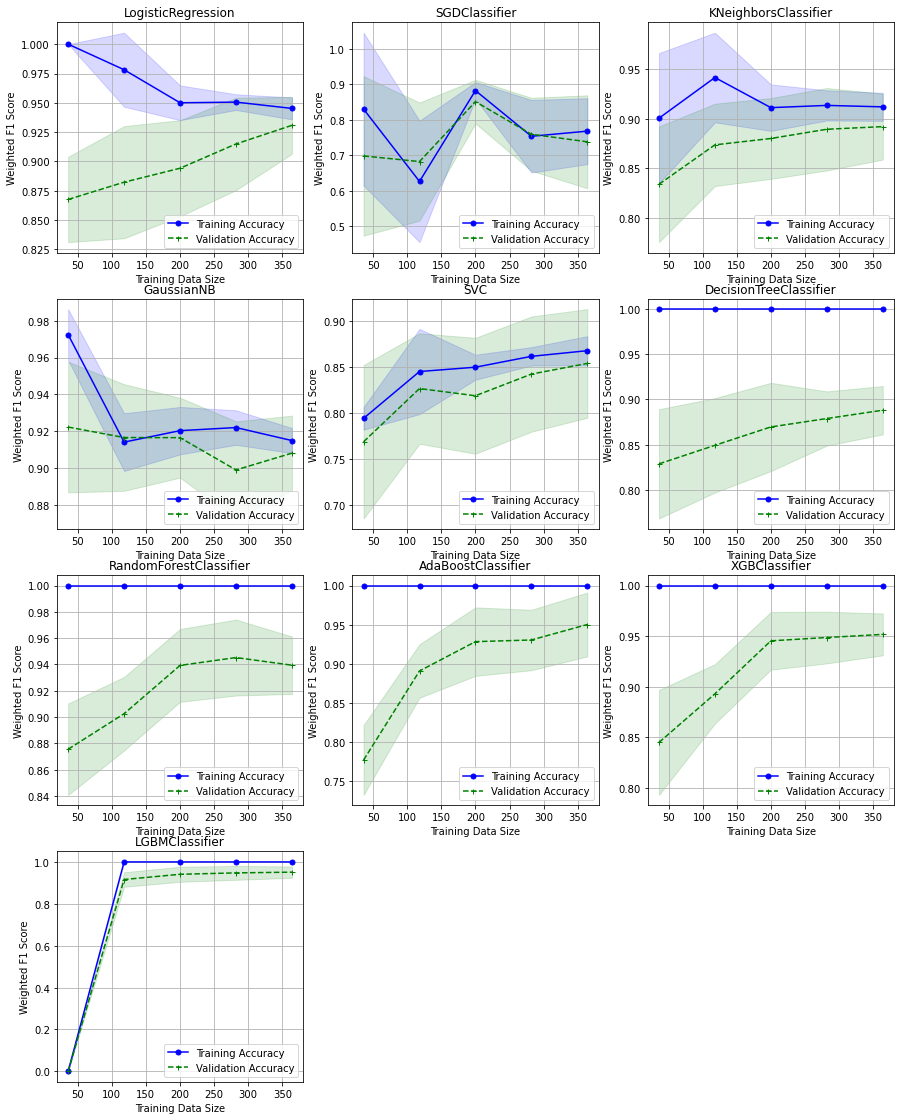

In [156]:
# Machine Learning Model Build
classifier_model = [LogisticRegression(solver = 'liblinear', random_state=42, max_iter=100),
                    SGDClassifier(random_state=42),
                    KNeighborsClassifier(),
                    GaussianNB(),
                    SVC(random_state=42),
                    DecisionTreeClassifier(random_state=42),
                    RandomForestClassifier(random_state=42), 
                    AdaBoostClassifier(random_state=42), 
                    XGBClassifier(objective="binary:logistic", random_state=42, eval_metric='mlogloss', use_label_encoder=False),
                    LGBMClassifier(random_state=42)
                   ]

# Call Classification module
class_perf_df, learning_curve_df, class_report_df = build_class_model(X_train, X_test, y_train, y_test, classifier_model)

print('Training Details - ')
display(class_perf_df)
print('Learning Curves - ')
create_learning_curve(learning_curve_df)

## Classfication Report

In [157]:
# Show Classfication Report
class_report_df
for clf in range(class_report_df.shape[0]):
    print('\n', class_report_df['Classifier'].iloc[clf])
    report = class_report_df['Report'].iloc[clf]
    df = pd.DataFrame(report).transpose()
    print(df)


 LogisticRegression
              precision    recall  f1-score    support
0              0.945946  0.985915  0.965517   71.00000
1              0.975000  0.906977  0.939759   43.00000
accuracy       0.956140  0.956140  0.956140    0.95614
macro avg      0.960473  0.946446  0.952638  114.00000
weighted avg   0.956905  0.956140  0.955801  114.00000

 SGDClassifier
              precision    recall  f1-score     support
0              0.865854  1.000000  0.928105   71.000000
1              1.000000  0.744186  0.853333   43.000000
accuracy       0.903509  0.903509  0.903509    0.903509
macro avg      0.932927  0.872093  0.890719  114.000000
weighted avg   0.916453  0.903509  0.899901  114.000000

 KNeighborsClassifier
              precision    recall  f1-score    support
0              0.934211  1.000000  0.965986   71.00000
1              1.000000  0.883721  0.938272   43.00000
accuracy       0.956140  0.956140  0.956140    0.95614
macro avg      0.967105  0.941860  0.952129  114.00000

## CLASSIFICATION MATRIX

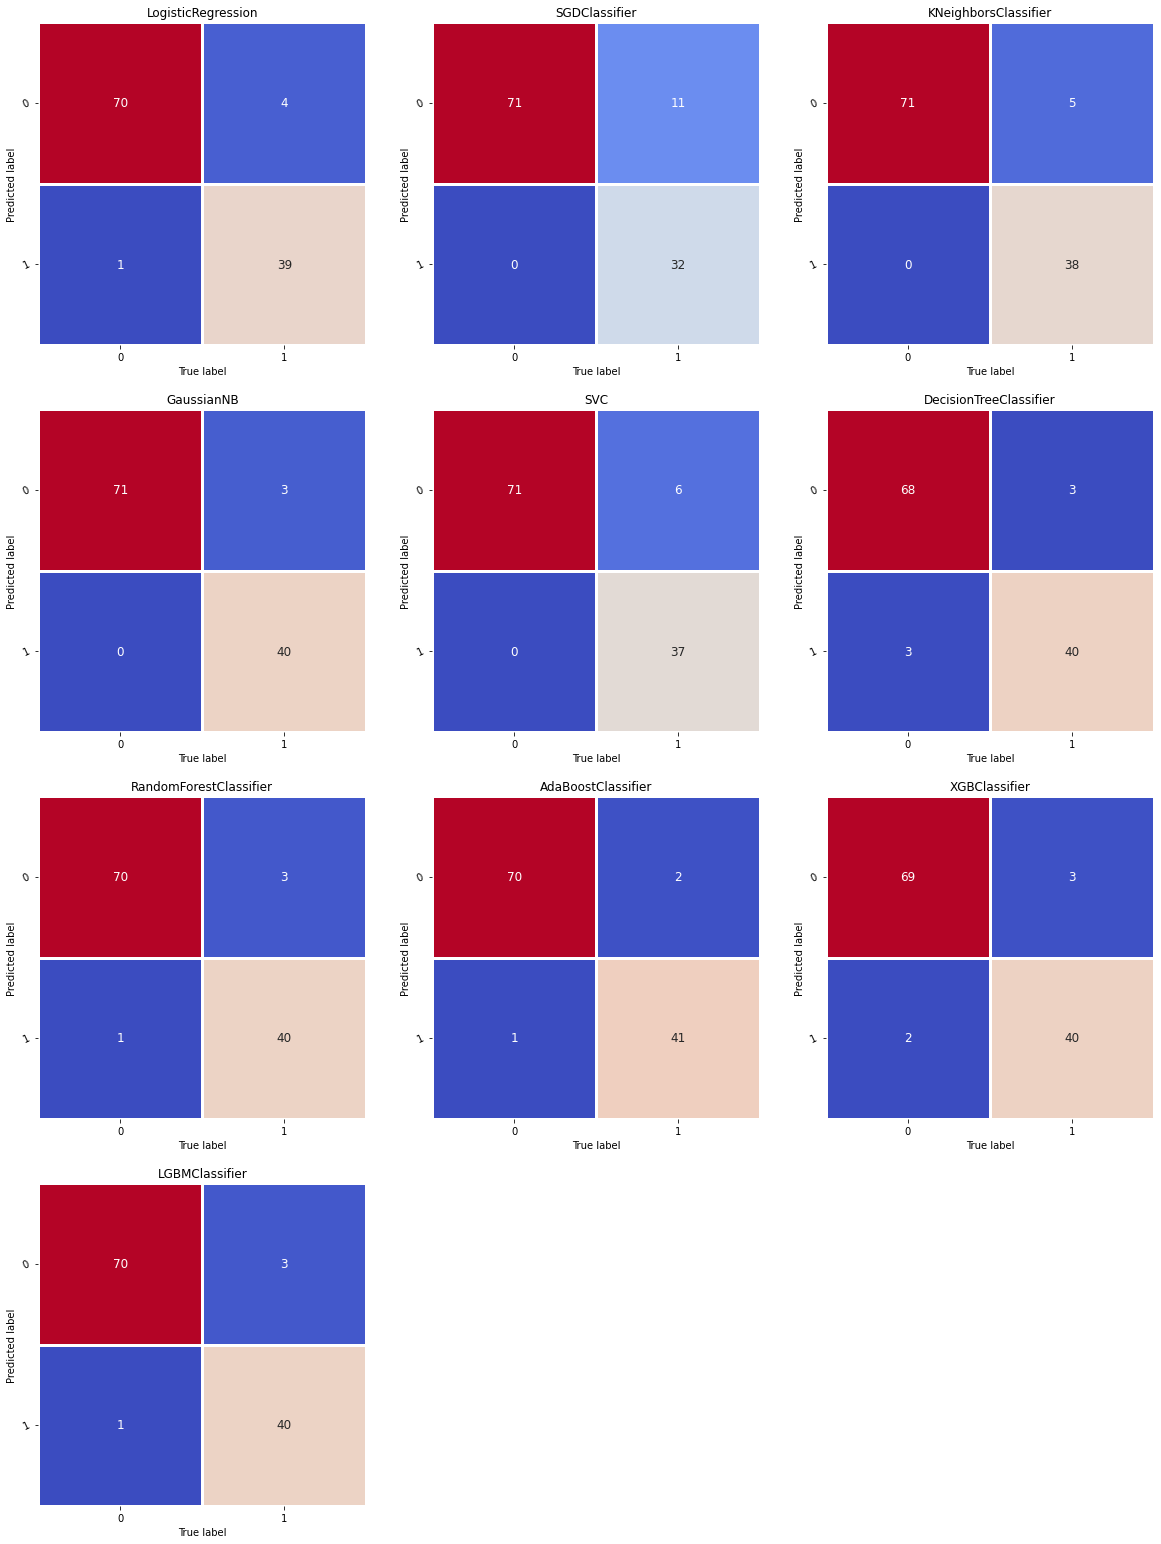

In [158]:
# Show Confusion Matrix
plt.figure(figsize=(20, 70))
view_confusion_matrix(class_perf_df, columns=3)